# UFABC - ESTI019 - Codificação de Sinais Multimídia
<h2> Laboratório 6 - Seção de PDS da Voz </h2>
<h3> Prof. Mário Minami </h2>
<h2> OBJETIVOS: </h2>
<ol>
<li> Analisar arquivos de Áudio com dígitos, números gerais, texto lido e poesia </li>
<li> Leitura de Arquivos de Áudio e janelamento</li>
<li> Cálculo das Energias de Tempo Curto</li>
<li> Cálculo dos Espectrogramas</li>
<li> Determinação do Pitch, da Frequência Fundamental e das Formantes ($f_1$ a $f_4$) de Algumas Vogais</li>
<li>Determinação de fonemas surdos, sonoros, consoantes gerais e plosivos</li>
</ol>

<h2> 1. Subir os arquivos de Áudio com dígitos, números gerais, texto lido e poesia </h2>

Suba os arquivos com:
<ul>
<li> Dígitos (pronunciados separadamente) </li>
<li> Números Gerais (p.ex. dia/mês/ano de nascimento, nº celular, RA)</li>
<li> Texto lido </li>
<li> Poesia declamada </li>
</ul>


<h2> 2. Leitura de Arquivos de Áudio e janelamento </h2>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [110]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display
#OBS.: insira nome do arquivo WAV
audio1 = '/content/drive/My Drive/Colab Notebooks/RA11201922156.wav'
print(audio1)
v1 , sr1 = librosa.load(audio1)
print(type(v1), type(sr1))
print(v1.shape, sr1)
# Player será aberto! AGUARDE até abrir!
IPython.display.Audio(data=v1, rate=sr1)

/content/drive/My Drive/Colab Notebooks/RA11201922156.wav
<class 'numpy.ndarray'> <class 'int'>
(288334,) 22050


Text(0.5, 1.0, 'Forma de onda')

<Figure size 640x480 with 0 Axes>

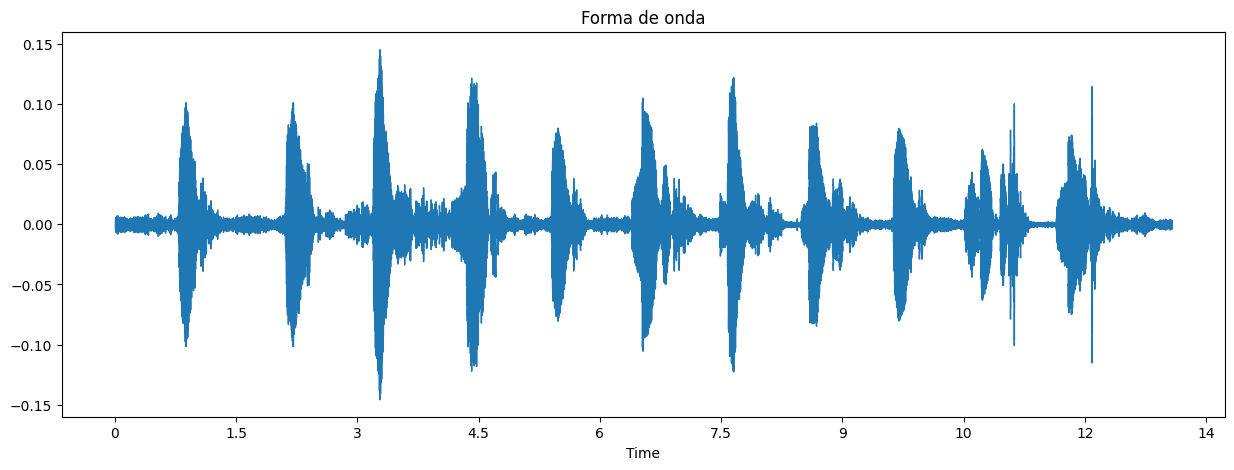

In [111]:
plt.figure()
fig, ax = plt.subplots(figsize=(15, 5))
librosa.display.waveshow(v1, sr=sr1)
plt.title('Forma de onda')

### 2.1 Definição dos Parâmetros da Análise

In [112]:
print('Frequência de Amostragem', sr1)

Frequência de Amostragem 22050


In [113]:
fa = sr1
print(fa)

22050


In [114]:
Ts = 0.04   # Tempo de duração do segmento em segundos
Nj = int(Ts*fa) # Número de pontos da Janela
print('Tamanho do Segmento', Nj)

Tamanho do Segmento 882


In [115]:
Nseg = int(len(v1)/Nj)
Nover = int(Nj*0.5)
print('Número de Segmentos no Arquivo', Nseg, '. Pontos Soprepostos', Nover )

Número de Segmentos no Arquivo 326 . Pontos Soprepostos 441


<h3> 2.2 Obtendo uma Janela de Hamming </h3>

Text(0.5, 1.0, 'Janela de Hamming')

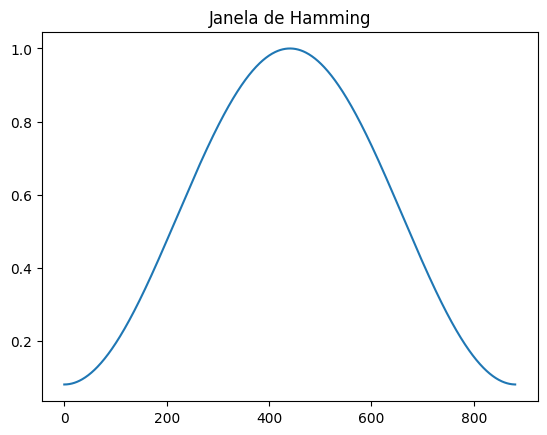

In [116]:
from scipy import signal
hm = signal.get_window('hamming', Nj)
plt.plot(hm); plt.title('Janela de Hamming')

<h2> 3. Energia de Tempo Curto </h2>

### 3.1 Cálculo para arquivo de teste

Text(0.5, 0, 'Segmento')

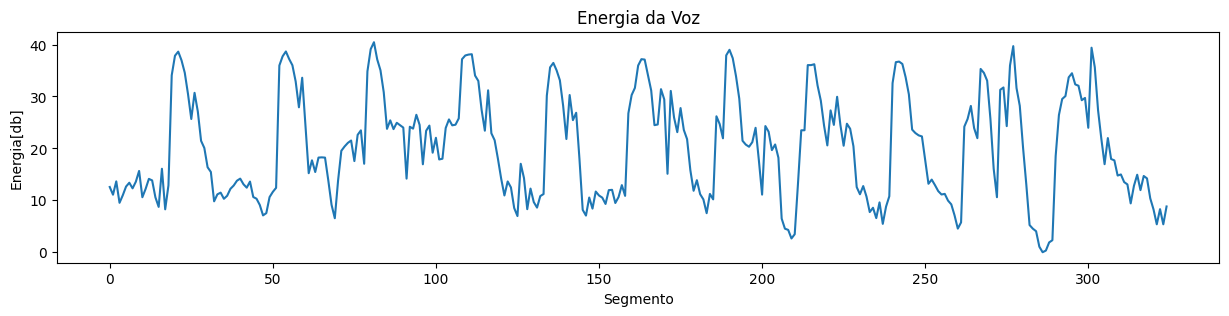

In [117]:
Nover = int(Nj*0.5)
Nseg = int(len(v1)/Nj)
E = []
for l in range(1, Nseg):
    xjan = v1[(l-1)*Nj+Nover:l*Nj+Nover]*hm
    x2 = list(np.array(xjan**2))
    aux = sum(x2)/Nj
    E.append(aux)
E = 10*np.log10(E)
Emin = np.min(E)  # calcula nível de ruído de fundo
plt.figure
fig, ax = plt.subplots(figsize=(15, 3))
plt.plot(E - Emin)
plt.title('Energia da Voz')
plt.ylabel('Energia[db]'); plt.xlabel('Segmento')

### 3.2 Agora leia os seus arquivos gravados e:
**Determine o Contorno de Energia para três arquivos (todos os integrantes devem fazer a análise do gravaram):**
1. *dígitos*
2. *voz falada*
3. *voz declamada (poema)*


<h2> 4. Espectrogramas </h2>

### 4.1 Visualização do Espectrograma para Arquivo de Teste

Text(0.5, 1.0, 'Espectrograma')

<Figure size 1200x800 with 0 Axes>

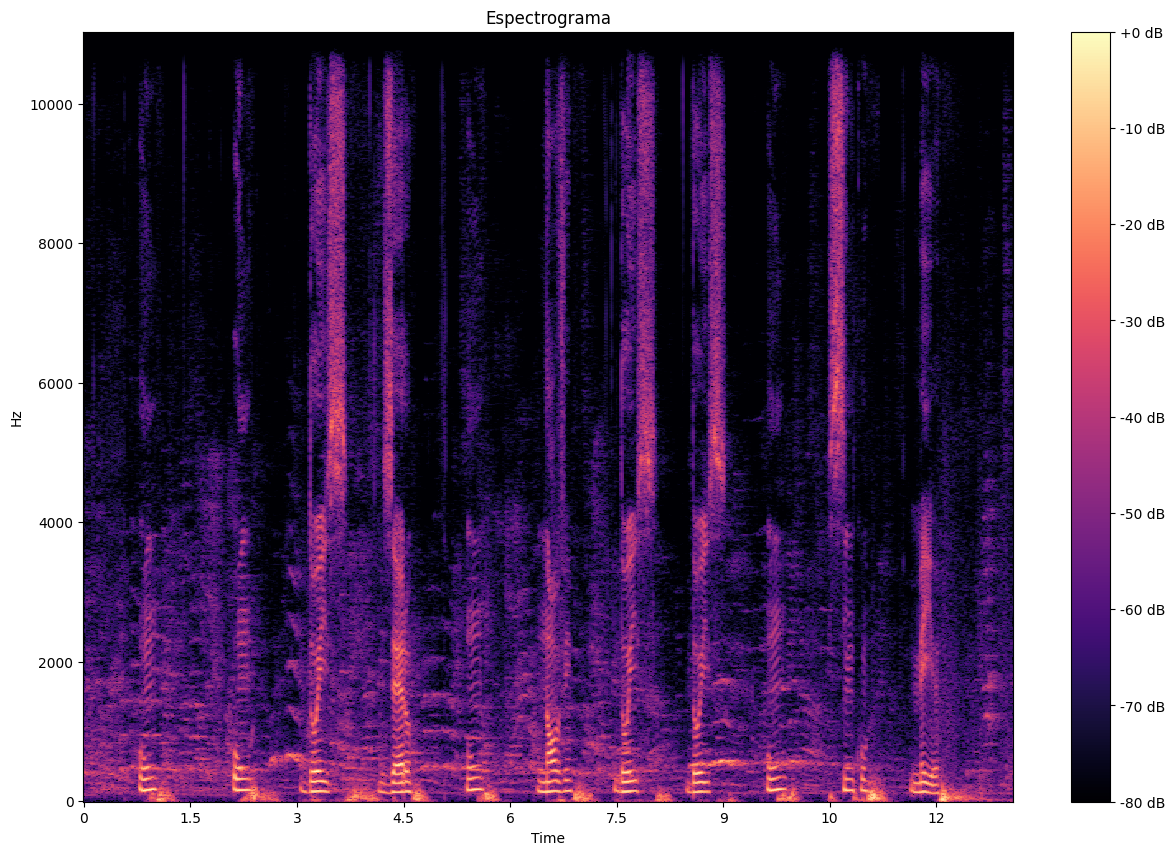

In [118]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
D = librosa.amplitude_to_db(np.abs(librosa.stft(v1)), ref=np.max)
fig, ax = plt.subplots(figsize=(15, 10))
librosa.display.specshow(D, x_axis='time',y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma')

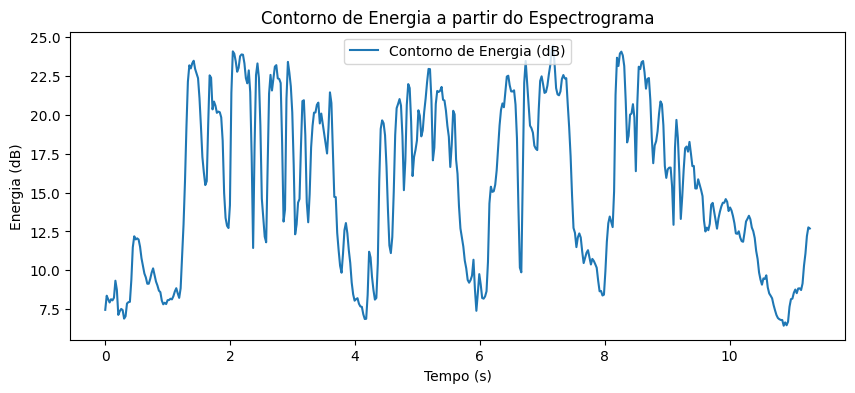

In [129]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Carregar o sinal de áudio
y, sr = librosa.load('/content/drive/My Drive/Colab Notebooks/Frase1_Medeiros.wav')

# Calcular o espectrograma de magnitude
S = np.abs(librosa.stft(y))

# Calcular o contorno de energia
energy_contour = np.sum(S, axis=0)  # Soma ao longo das frequências

# Converter para dB (opcional)
energy_contour_db = 10 * np.log10(energy_contour + 1e-6)  # Adiciona pequeno valor para evitar log(0)

# Criar eixo temporal
times = librosa.frames_to_time(np.arange(energy_contour.shape[0]), sr=sr)

# Plotar o contorno de energia
plt.figure(figsize=(10, 4))
plt.plot(times, energy_contour_db, label='Contorno de Energia (dB)')
plt.xlabel('Tempo (s)')
plt.ylabel('Energia (dB)')
plt.title('Contorno de Energia a partir do Espectrograma')
plt.legend()
plt.show()

### 4.2 Agora com os seus arquivos
**Faça os espectrogramas para os arquivos que vocês gravaram (todos novamente) e calculem o contorno de energia:**
<ul>
<li> Dígitos </li>
<li> Texto Lido </li>
<li> Poesia </li>
</ul>

<h2> 5. Determinação do Pitch e da F0 </h2>

### 5.1 Pitch do Arquivo Teste1

In [120]:
# Segmente um fonema que tenha Pitch, p.ex "En" de "Entre"
v1En = v1[4000:16000]
IPython.display.Audio(data=v1En, rate=sr1)


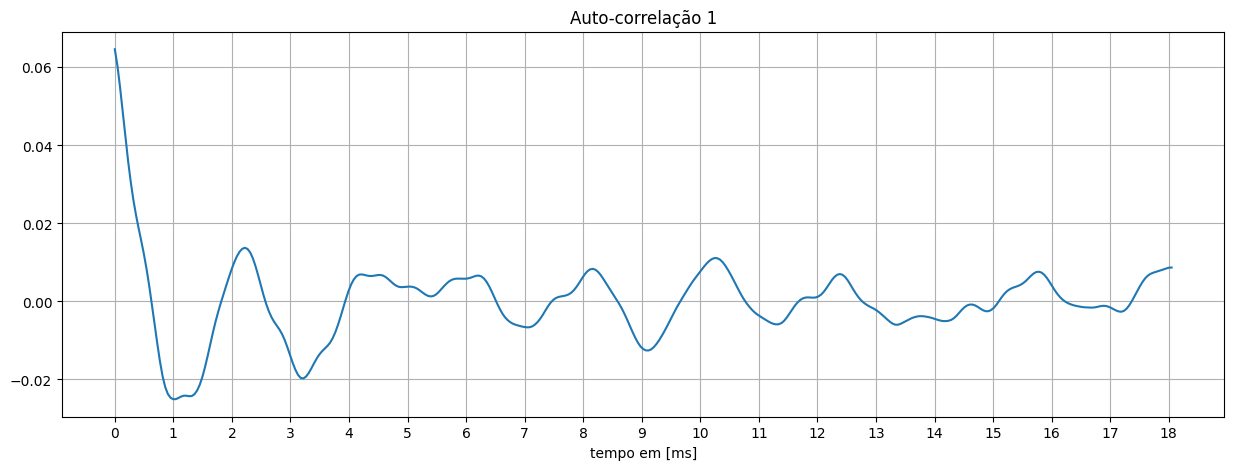

In [121]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
acEn = librosa.autocorrelate(v1En, max_size= sr1/32)
fig, ax = plt.subplots(figsize=(15, 5))
ax.xaxis.set_major_locator(MultipleLocator(1))
y1 = acEn[1:400]
x1 = range(len(y1))
xx = [i*1000/sr1 for i in x1]
plt.grid(True)
ax.plot(xx,y1)

plt.title('Auto-correlação 1')
plt.xlabel('tempo em [ms]')
plt.show()

### O Período de Pitch ($T_{0}$) será o intervalo entre picos sucessivos.
### A Frequência Fundamental ($f_0$) será o inverso do periódo de Pitch

### 5.2 Pitch do Arquivo Teste2

In [122]:
# Segmente outro fonema que tenha Pitch, p.ex "Ag" de "Agora"
v1A = v1[48000:56000]
IPython.display.Audio(data=v1A, rate=sr1)

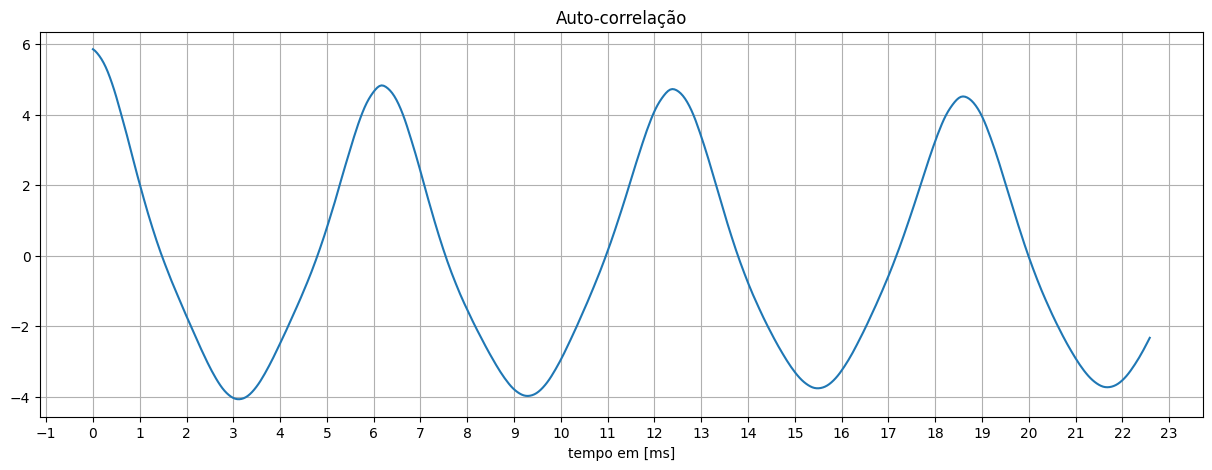

In [123]:
acA = librosa.autocorrelate(v1A, max_size= sr1/32)
fig, ax2 = plt.subplots(figsize=(15, 5))
ax2.xaxis.set_major_locator(MultipleLocator(1))
y2 = acA[1:500]
x2 = range(len(y2))
xx2 = [i*1000/sr1 for i in x2]
plt.grid(True)
ax2.plot(xx2,y2)

plt.title('Auto-correlação')
plt.xlabel('tempo em [ms]')
plt.show()

Determine o Período de Pitch e a Fundamental desta vogal.

## Agora com cada um dos seus arquivos:
**Determine o Pitch e a $f_0$ das vogais que desejarem (três vogais diferentes) dos seus arquivos, para as versões:**
1. Dígitos
2. Falada
3. Declamada

## 5.3 Determinação das Formantes

#### 5.3.a Formantes do trecho de teste

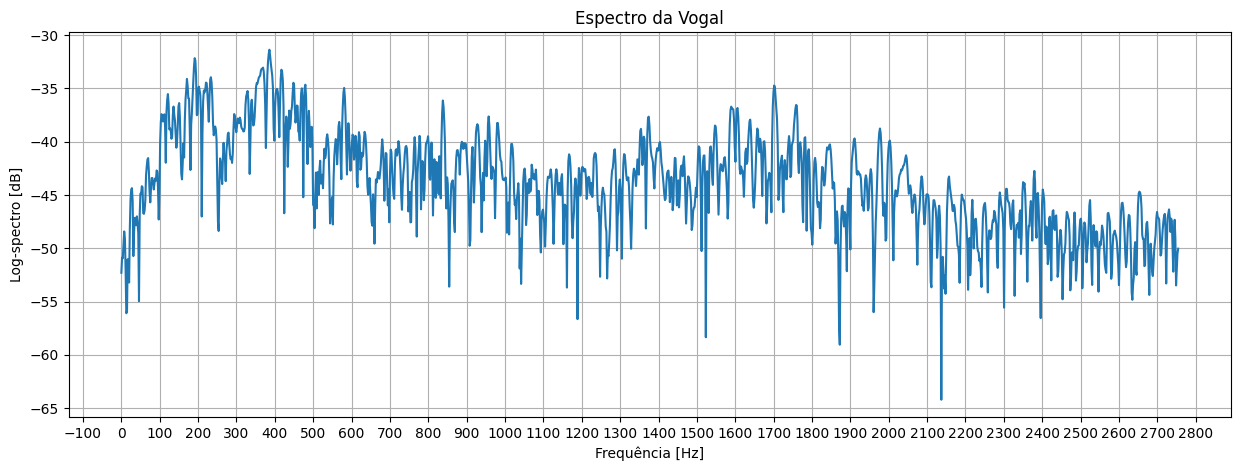

In [124]:
# AUDIO DE "En" em v1En
f, Pxx_spec = signal.periodogram(v1En, fa, 'flattop', scaling='spectrum')
lf = len(f)
fig, AX = plt.subplots(figsize=(15, 5))
AX.xaxis.set_major_locator(MultipleLocator(100))
AX.plot(f[:int(lf/4)], 10*np.log10(np.sqrt(Pxx_spec[:int(lf/4)])))
plt.xlabel('Frequência [Hz]')
plt.ylabel('Log-spectro [dB]')
plt.title('Espectro da Vogal')
plt.grid(True)
plt.show()


F1: 385.88 Hz
F2: 1701.52 Hz
F3: 2653.35 Hz
F4: 2653.35 Hz


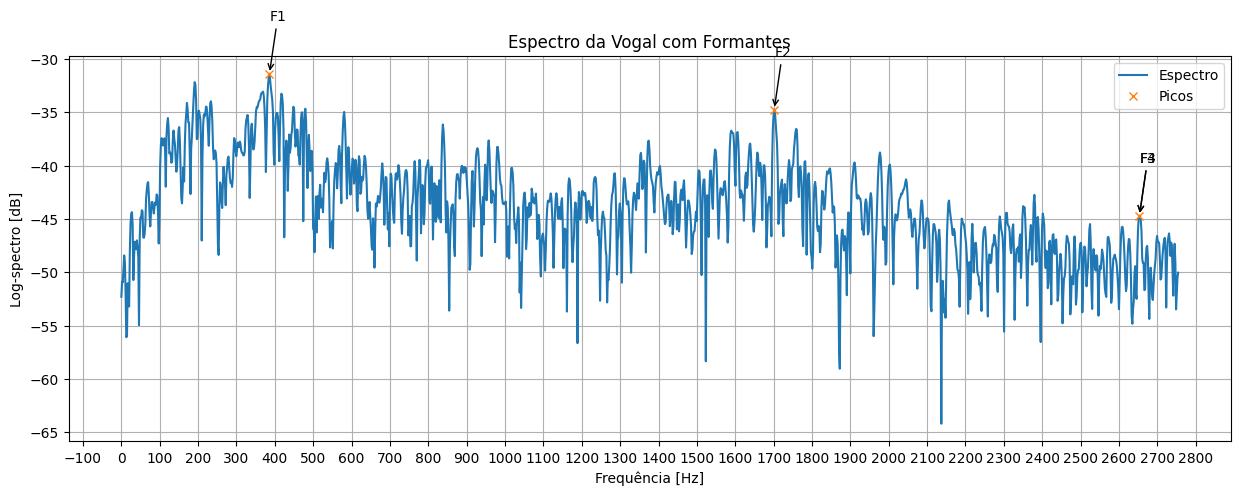

In [125]:
from scipy.signal import find_peaks

# Localizar picos no espectro
peaks, _ = find_peaks(10 * np.log10(np.sqrt(Pxx_spec[:int(lf/4)])), height=-np.inf, distance=fa/50)

# Filtrar formantes por faixa de frequência
formant_ranges = {
    'F1': (200, 900),
    'F2': (600, 2500),
    'F3': (1800, 3500),
    'F4': (2500, 5000)
}

formants = {}
for name, (low, high) in formant_ranges.items():
    valid_peaks = [f[p] for p in peaks if low <= f[p] <= high]
    if valid_peaks:
        formants[name] = valid_peaks[0]  # Considerar o pico mais forte na faixa

# Exibir resultados
for name, freq in formants.items():
    print(f'{name}: {freq:.2f} Hz')

# Plotando os picos identificados
fig, AX = plt.subplots(figsize=(15, 5))
AX.xaxis.set_major_locator(MultipleLocator(100))
AX.plot(f[:int(lf/4)], 10*np.log10(np.sqrt(Pxx_spec[:int(lf/4)])), label='Espectro')
AX.plot(f[peaks], 10 * np.log10(np.sqrt(Pxx_spec[peaks])), 'x', label='Picos')
for name, freq in formants.items():
    AX.annotate(f'{name}', xy=(freq, 10 * np.log10(np.sqrt(Pxx_spec[list(f).index(freq)]))),
                xytext=(freq, 10 * np.log10(np.sqrt(Pxx_spec[list(f).index(freq)])) + 5),
                arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.xlabel('Frequência [Hz]')
plt.ylabel('Log-spectro [dB]')
plt.title('Espectro da Vogal com Formantes')
plt.grid(True)
plt.legend()
plt.show()

#### 5.3.b Os quatro primeros picos no espectro são as formantes $f_1$ a $f_4$
### 5.4 Agora com seus arquivos
Determine as formantes das vogais dos arquivos que vocês calcularam os espectrogramas

## 6. Determinação de Consoantes e Plosivos

Usando alguns de seus arquivos, no espectrograma, determine algumas consoantes surdas (p.ex. /s/ e /f/), surdas plosivas (p.ex. /p/, /t/ ou /k/) e sonoras (p.ex. (/b/, /v/, /g/, /m/, /nh/ e /lh/). Destaque circundando-as no espectrograma.

# 7. RELATÓRIO, parte do COLAB

* A áudio descrição pode ser mais simplificada, pois neste Lab são muitos os arquivos de áudio.  
* Na página do Laboratório (LEMBREM-SE que os notebooks são ANEXOS, e não páginas html), incluir os arquivos de voz de cada um dos integrantes.
*   Fazer uma tabela com todos os valores de pitch e $f_0$ de todos os integrantes, de acordo com o item 5.2., e comparem-nas.
* Escolher um conjunto de formantes ($f_1$ a $f_4$) de cada integrante, para a mesma vogal, e comparem-nas.
* Fazer uma seção de **Comentários e Conclusões** incluindo a análise dos espectrogramas das consoantes.





---

